In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로

file_path = "./전처리_0508.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 불러온 데이터프레임 출력
print(df)

               Datetime  Production  Temperature  Humidity  Power_Cost  DoW  \
0       2021-02-08 0:15         116         -4.2      65.6       109.8    0   
1       2021-02-08 0:30         116         -4.2      63.5       109.8    0   
2       2021-02-08 0:45         114         -4.2      67.6       109.8    0   
3       2021-02-08 1:00         114         -5.5      72.8       109.8    0   
4       2021-02-08 1:15         116         -5.5      67.4       109.8    0   
...                 ...         ...          ...       ...         ...  ...   
24474  2021-10-21 22:45         129         23.6      74.0       167.2    3   
24475  2021-10-21 23:00         217         22.5      74.6       167.2    3   
24476  2021-10-21 23:15         217         22.2      71.3       167.2    3   
24477  2021-10-21 23:30         213         23.1      72.7       167.2    3   
24478  2021-10-21 23:45         215         22.2      71.6       167.2    3   

       Worker_Power  Man_Cost  Power_Usage  
0     

In [2]:
#Train, Test 데이터 분리
df = df.sample(frac=1)
train_len = round(len(df)*0.7)
train_dataframe = df[:train_len]
test_dataframe = df[train_len:]
train_Power_usage=list(train_dataframe['Power_Usage'])
test_Power_usage=list(test_dataframe['Power_Usage'])
train_man_cost = list(train_dataframe['Man_Cost'])
train_power_cost = list(train_dataframe['Power_Cost'])
test_man_cost = list(test_dataframe['Man_Cost'])
test_power_cost = list(test_dataframe['Power_Cost'])
drop_col_list = ['Datetime', 'Man_Cost', 'Power_Usage', 'Power_Cost']

In [3]:
pip install tensorflow

   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
    --------------------------------------- 10.2/413.4 kB ? eta -:--:--
   - ------------------------------------- 20.5/413.4 kB 222.6 kB/s eta 0:00:02
   ------ -------------------------------- 71.7/413.4 kB 563.7 kB/s eta 0:00:01
   ---------------------------- ----------- 297.0/413.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  409.6/413.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 413.4/413.4 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.27.0
    Uninstalling protobuf-5.27.0:
      Successfully uninstalled protobuf-5.27.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ortools 9.10.4067 requires protobuf>=5.26.1, but you have protobuf 4.25.3 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# 'Power_Usage' 열을 출력 변수(y)로 설정하고 나머지를 입력 변수(X)로 설정합니다.
X_train = train_dataframe.drop(drop_col_list,axis=1)
y_train = train_dataframe['Power_Usage']
X_test = test_dataframe.drop(drop_col_list,axis=1)
y_test = test_dataframe['Power_Usage']

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일링된 데이터와 원래의 타겟 값을 출력해 확인합니다.
print("X_train_scaled:\n", X_train_scaled)
print("y_train:\n", y_train)
print("X_test_scaled:\n", X_test_scaled)
print("y_test:\n", y_test)

# 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

# 출력층 추가 (연속형 데이터를 예측하기 때문에 활성화 함수 사용 안 함)
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2)

# 모델 평가
loss = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Data: {loss}')

#train_result 산출
train_result = model.predict(X_train_scaled)

# 예측
predictions = model.predict(X_test_scaled)

# 예측 결과와 실제 값 비교
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
# print(comparison.head())

X_train_scaled:
 [[ 0.59824263 -0.92602586 -0.55293359  0.48993405  0.27419314]
 [-0.54838907 -0.86408536  0.96118543  1.49370281 -0.45941416]
 [-0.55774933 -1.57640113 -1.09073543  1.49370281 -0.4543548 ]
 ...
 [-0.55774933  0.30246075 -1.74850845  0.99181843 -0.45941416]
 [-0.14121782  0.85992527 -0.23852636  0.48993405 -0.03442786]
 [-0.34714351 -0.04853542  1.01910256  1.49370281 -0.23174293]]
y_train:
 9920     201
4247      68
2824     189
21715    142
11384    190
        ... 
20470     61
12769    114
4852      66
14639    174
14031    152
Name: Power_Usage, Length: 17135, dtype: int64
X_test_scaled:
 [[ 2.20352701  0.20955     0.15448268 -1.51760346  1.93366345]
 [ 0.27063357  0.56054618  0.72124308 -1.51760346  0.79530729]
 [ 0.24255279 -0.87440878  1.20940167 -1.51760346  0.16794656]
 ...
 [ 0.48123939  0.52957593  1.22181248 -1.51760346  0.54233926]
 [-0.53902882 -1.23572837  0.64677821 -1.01571908 -0.46447353]
 [-0.53434869  0.91154235  0.86603588 -1.51760346 -0.44929544]]

C:\Users\k\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1371/1371 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 10226.3301 - val_loss: 2400.9287
Epoch 2/50
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - loss: 2325.8225 - val_loss: 2145.4019
Epoch 3/50
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 2101.8792 - val_loss: 1877.0635
Epoch 4/50
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 1793.6292 - val_loss: 1494.2389
Epoch 5/50
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - loss: 1415.7279 - val_loss: 1231.7080
Epoch 6/50
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - loss: 1244.4457 - val_loss: 1138.9125
Epoch 7/50
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 3s 968us/step - loss: 1157.9656 - val_loss: 1079.9109
Epoch 8/50
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - loss: 1135.0480 - val_loss: 1034.5044
Epoch 9/50
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - loss: 1085.4236 - val_loss: 1003.2111
Epoch 10/50
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1097.6105 - val_loss: 1005.8214
Epoch 11/50
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/s

       Actual   Predicted
9920      201  207.003174
4247       68  100.328392
2824      189  100.433769
21715     142  148.129913
11384     190  183.675323


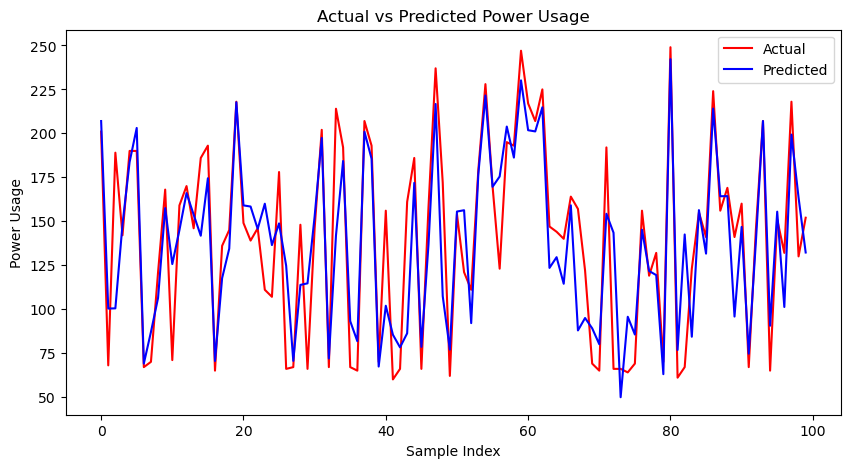

In [6]:
# 예측 결과와 실제 값 비교
comparison1 = pd.DataFrame({'Actual': y_train, 'Predicted': train_result.flatten()})
print(comparison1.head())

comparison1 = comparison1.head(100)
plt.figure(figsize=(10, 5))
plt.plot(comparison1['Actual'].values, color='red', label='Actual', linestyle='-')
plt.plot(comparison1['Predicted'].values, color='blue', label='Predicted', linestyle='-')
plt.title('Actual vs Predicted Power Usage')
plt.xlabel('Sample Index')
plt.ylabel('Power Usage')
plt.legend()
plt.show()

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
       Actual   Predicted
13516     181  159.831665
23452     136  130.062622
2043      206  174.953827
18285      69   67.814789
7611       65  138.749039


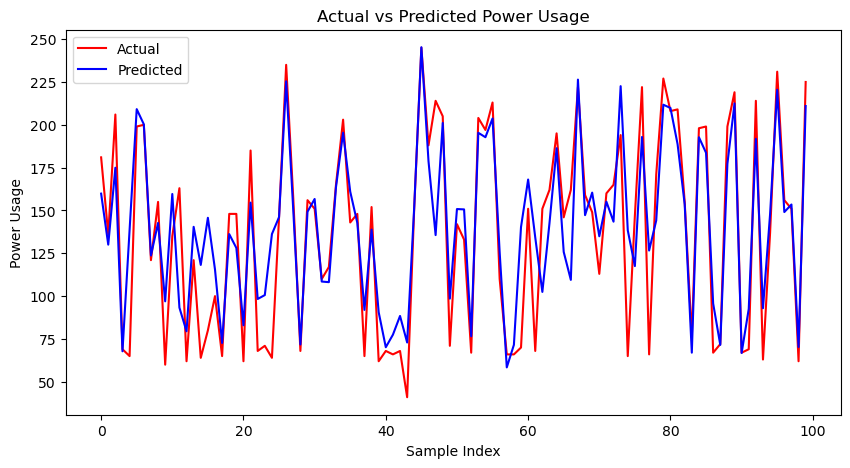

In [7]:
#test_result
test_result = model.predict(X_test_scaled)

# 예측 결과와 실제 값 비교
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': test_result.flatten()})
print(comparison.head())

comparison = comparison.head(100)
plt.figure(figsize=(10, 5))
plt.plot(comparison['Actual'].values, color='red', label='Actual', linestyle='-')
plt.plot(comparison['Predicted'].values, color='blue', label='Predicted', linestyle='-')
plt.title('Actual vs Predicted Power Usage')
plt.xlabel('Sample Index')
plt.ylabel('Power Usage')
plt.legend()
plt.show()

In [8]:
test_result

array([[159.83167],
       [130.06262],
       [174.95383],
       ...,
       [156.59897],
       [106.48218],
       [101.14503]], dtype=float32)

In [12]:
pip install ortools

   ---------------------------------------- 0.0/130.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/130.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/130.2 MB 1.3 MB/s eta 0:01:40
   ---------------------------------------- 0.6/130.2 MB 5.0 MB/s eta 0:00:26
   ---------------------------------------- 1.1/130.2 MB 7.0 MB/s eta 0:00:19
   ---------------------------------------- 1.2/130.2 MB 7.1 MB/s eta 0:00:19
   ---------------------------------------- 1.3/130.2 MB 5.5 MB/s eta 0:00:24
   ---------------------------------------- 1.4/130.2 MB 4.9 MB/s eta 0:00:27
    --------------------------------------- 2.2/130.2 MB 6.0 MB/s eta 0:00:22
    --------------------------------------- 2.6/130.2 MB 6.6 MB/s eta 0:00:20
    --------------------------------------- 3.1/130.2 MB 7.1 MB/s eta 0:00:18
   - -------------------------------------- 3.7/130.2 MB 7.6 MB/s eta 0:00:17
   - -------------------------------------- 4.2/130.2 MB 7.9 MB/s eta 0:00:16


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires protobuf<5,>=3.20, but you have protobuf 5.27.0 which is incompatible.
tensorflow-intel 2.16.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.27.0 which is incompatible.


In [14]:
from ortools.linear_solver import pywraplp
import numpy as np

solution_list = []
work_list = []
sol_work_list = []

for i, cost in enumerate(test_man_cost):
    solver = pywraplp.Solver.CreateSolver('GLOP')
    if not solver:
        print("Solver not created")
        continue

    # 변수 정의: x는 10 이상인 정수 변수
    x = solver.IntVar(10, solver.infinity(), 'x')

    # cost와 test_result[i]의 합을 상수로 정의
    cost_value = cost if not isinstance(cost, np.ndarray) else cost.item()
    test_result_value = test_result[i] if not isinstance(test_result[i], np.ndarray) else test_result[i].item()
    total_cost = float(cost_value + test_result_value)
    power_usage_cost = float(test_power_cost[i] * test_Power_usage[i])

    # 목적 함수: 비용을 최소화
    solver.Minimize(x * total_cost)

    # 제약 조건 추가
    solver.Add(x * total_cost >= power_usage_cost)
    solver.Add(x >= 10)

    # 솔버 실행
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        solution_list.append(x.solution_value())
        work_list.append(power_usage_cost)
        sol_work_list.append(int(x.solution_value() + 1) * total_cost)
    else:
        print(f"Solver did not find an optimal solution for index {i}")

# # 결과 출력
# print("Solutions:", solution_list)
# print("Work List:", work_list)
# print("Solution Work List:", sol_work_list)


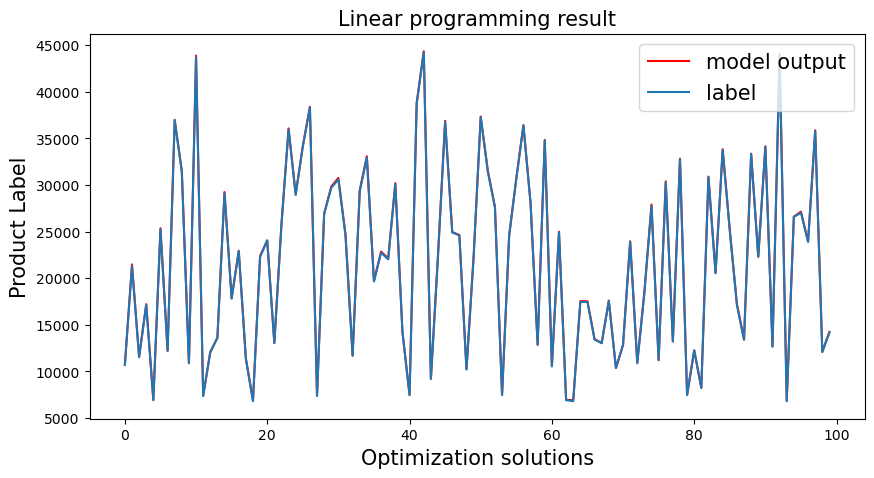

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(sol_work_list[:100],color='red',label='model output')
ax.plot(work_list[:100],label='label')
ax.set_xlabel('Optimization solutions')
ax.set_ylabel('Product Label')
ax.set_title('Linear programming result')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.title.set_fontsize(15)
plt.legend(fontsize=15)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 준비
test_data_x = test_dataframe.drop(drop_col_list, axis=1)
train_data_x = train_dataframe.drop(drop_col_list, axis=1)
y_test = test_dataframe['Power_Usage']
y_train = train_dataframe['Power_Usage']

# 랜덤 포레스트 모델 학습 및 예측
rf_reg = RandomForestRegressor(max_depth=5)
rf_reg.fit(train_data_x, y_train)
train_result_rf = rf_reg.predict(train_data_x)
test_result_rf = rf_reg.predict(test_data_x)

# 랜덤 포레스트 평가
rf_train_mse = mean_squared_error(y_train, train_result_rf)
rf_test_mse = mean_squared_error(y_test, test_result_rf)
print(f"Random Forest Train MSE: {rf_train_mse}")
print(f"Random Forest Test MSE: {rf_test_mse}")

# 인공신경망 모델의 예측 결과를 이미 얻은 상태로 가정
# test_result_nn = 인공신경망 모델의 예측 결과
# train_result_nn = 인공신경망 모델의 학습 데이터 예측 결과

Random Forest Train MSE: 879.3334000140748
Random Forest Test MSE: 921.9690920652434


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# MAPE 계산 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 평가 지표 계산 (랜덤 포레스트)
rf_mse = mean_squared_error(y_test, test_result_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, test_result_rf)
rf_mape = mean_absolute_percentage_error(y_test, test_result_rf)
rf_r2 = r2_score(y_test, test_result_rf)

# 평가 지표 계산 (인공신경망)
nn_train_mse = mean_squared_error(y_train, train_result)
nn_test_mse = mean_squared_error(y_test, test_result)
nn_rmse = np.sqrt(nn_test_mse)
nn_mae = mean_absolute_error(y_test, test_result)
nn_mape = mean_absolute_percentage_error(y_test, test_result)
nn_r2 = r2_score(y_test, test_result)

# 평가 결과 출력
print("Random Forest Performance:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Mean Absolute Percentage Error (MAPE): {rf_mape}")
print(f"R-squared (R2): {rf_r2}")

print("\nNeural Network Performance:")
print(f"Mean Squared Error (MSE): {nn_test_mse}")
print(f"Root Mean Squared Error (RMSE): {nn_rmse}")
print(f"Mean Absolute Error (MAE): {nn_mae}")
print(f"Mean Absolute Percentage Error (MAPE): {nn_mape}")
print(f"R-squared (R2): {nn_r2}")

# 시각화
plt.figure(figsize=(14, 7))

# 실제 값과 예측 값 비교
plt.subplot(1, 2, 1)
plt.plot(y_test.values[:100], label='Actual', color='blue', marker='o')
plt.plot(test_result_rf[:100], label='RF Predicted', color='green', linestyle='dashed', marker='x')
plt.plot(test_result[:100], label='NN Predicted', color='red', linestyle='dashed', marker='x')
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Power Usage')
plt.legend()

# MSE 비교
plt.subplot(1, 2, 2)
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE']
rf_metrics = [rf_mse, rf_rmse, rf_mae, rf_mape]
nn_metrics = [nn_test_mse, nn_rmse, nn_mae, nn_mape]
x = np.arange(len(metrics))

plt.bar(x - 0.2, rf_metrics, width=0.4, label='Random Forest', color='green')
plt.bar(x + 0.2, nn_metrics, width=0.4, label='Neural Network', color='red')
plt.xticks(x, metrics)
plt.title('Error Metrics Comparison')
plt.ylabel('Error Value')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (7344, 7344) instead

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# MAPE 계산 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# y_test와 test_result의 형상을 1차원으로 변환
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()
test_result = test_result.ravel()

# 평가 지표 계산 (랜덤 포레스트)
rf_mse = mean_squared_error(y_test, test_result_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, test_result_rf)
rf_mape = mean_absolute_percentage_error(y_test, test_result_rf)
rf_r2 = r2_score(y_test, test_result_rf)

# 평가 지표 계산 (인공신경망)
nn_train_mse = mean_squared_error(y_train, train_result)
nn_test_mse = mean_squared_error(y_test, test_result)
nn_rmse = np.sqrt(nn_test_mse)
nn_mae = mean_absolute_error(y_test, test_result)
nn_mape = mean_absolute_percentage_error(y_test, test_result)
nn_r2 = r2_score(y_test, test_result)

# 평가 결과 출력
print("Random Forest Performance:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Mean Absolute Percentage Error (MAPE): {rf_mape}")
print(f"R-squared (R2): {rf_r2}")

print("\nNeural Network Performance:")
print(f"Mean Squared Error (MSE): {nn_test_mse}")
print(f"Root Mean Squared Error (RMSE): {nn_rmse}")
print(f"Mean Absolute Error (MAE): {nn_mae}")
print(f"Mean Absolute Percentage Error (MAPE): {nn_mape}")
print(f"R-squared (R2): {nn_r2}")

Random Forest Performance:
Mean Squared Error (MSE): 921.9690920652434
Root Mean Squared Error (RMSE): 30.3639439478017
Mean Absolute Error (MAE): 21.244426794711494
Mean Absolute Percentage Error (MAPE): 18.60404357916794
R-squared (R2): 0.7275843206132366

Neural Network Performance:
Mean Squared Error (MSE): 762.3929753803765
Root Mean Squared Error (RMSE): 27.61146456420551
Mean Absolute Error (MAE): 19.20128166857368
Mean Absolute Percentage Error (MAPE): 17.93990761156542
R-squared (R2): 0.7747345305440628
